In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Generate dataset
trX = np.linspace(-1, 1, 101)
trY = 2 * trX + np.random.randn(*trX.shape) * 0.33 # create a y value which is approximately linear but with some random noise

In [3]:
# Linear regression model
model = Sequential()
model.add(Dense(input_dim=1, output_dim=1, init='uniform', activation='linear'))
model.compile(optimizer='sgd', loss='mse')

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, activation="linear", units=1, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
# Print initial weights
weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))

Linear regression model is initialized with weight w: 0.04, b: 0.00


In [5]:
# Train
model.fit(trX, trY, nb_epoch=100, verbose=1)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
101/101 [==============================] - 3s 31ms/step - loss: 1.3089
Epoch 2/100
101/101 [==============================] - 0s 238us/step - loss: 1.2479
Epoch 3/100
101/101 [==============================] - 0s 247us/step - loss: 1.1863
Epoch 4/100
101/101 [==============================] - 0s 238us/step - loss: 1.1347
Epoch 5/100
101/101 [==============================] - 0s 158us/step - loss: 1.0835
Epoch 6/100
101/101 [==============================] - 0s 198us/step - loss: 1.0314
Epoch 7/100
101/101 [==============================] - 0s 168us/step - loss: 0.9879
Epoch 8/100
101/101 [==============================] - 0s 168us/step - loss: 0.9338
Epoch 9/100
101/101 [==============================] - 0s 218us/step - loss: 0.8922
Epoch 10/100
101/101 [==============================] - 0s 149us/step - loss: 0.8490
Epoch 11/100
101/101 [==============================] - 0s 139us/step - loss: 0.8077
Epoch 12/100
101/101 [==============================] - 0s 158us/step - los

In [6]:
# Print trained weights
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))

Linear regression model is trained with weight w: 1.81, b: 0.04


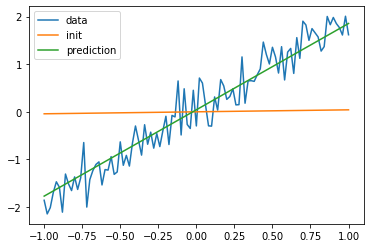

In [7]:
plt.plot(trX, trY, label='data')
plt.plot(trX, w_init*trX + b_init, label='init')
plt.plot(trX, w*trX + b, label='prediction')
plt.legend()
plt.show()

In [8]:
from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import np_utils

In [9]:
batch_size = 128
nb_classes = 10
nb_epoch = 100

In [10]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_Train = np_utils.to_categorical(y_train, nb_classes)
Y_Test = np_utils.to_categorical(y_test, nb_classes)

In [11]:
# Logistic regression model
model = Sequential()
model.add(Dense(output_dim=10, input_shape=(784,), init='normal', activation='softmax'))
model.compile(optimizer=SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_shape=(784,), activation="softmax", units=10, kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train
history = model.fit(X_train, Y_Train, nb_epoch=nb_epoch, batch_size=batch_size, verbose=1)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.7237 - accuracy: 0.8247
Epoch 2/100
60000/60000 [==============================] - 5s 91us/step - loss: 0.4320 - accuracy: 0.8853
Epoch 3/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.3856 - accuracy: 0.8950
Epoch 4/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.3623 - accuracy: 0.8999
Epoch 5/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.3472 - accuracy: 0.9039
Epoch 6/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.3368 - accuracy: 0.9065
Epoch 7/100
60000/60000 [==============================] - 4s 61us/step - loss: 0.3288 - accuracy: 0.9085
Epoch 8/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.3224 - accuracy: 0.9104
Epoch 9/100
60000/60000 [==============================] - 4s 74us/step - loss: 0.3171 - accuracy: 0.9117
Epoch 10/100
60000/60000 [==================

In [ ]:
# Evaluate
evaluation = model.evaluate(X_test, Y_Test, verbose=1)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))